# Decomposing time series

In [6]:
import pandas as pd

%matplotlib inline
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
QUANDL_KEY = '2Y3Ayy5N7QyELtc7axtz'
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
               start_date='2000-01-01',
               end_date='2011-12-31')
df.rename(columns = {'Value':'price'}, inplace=True)
df = df.resample('M').last()
df

,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19
...,...
2011-08-31,1755.81
2011-09-30,1771.85
2011-10-31,1665.21


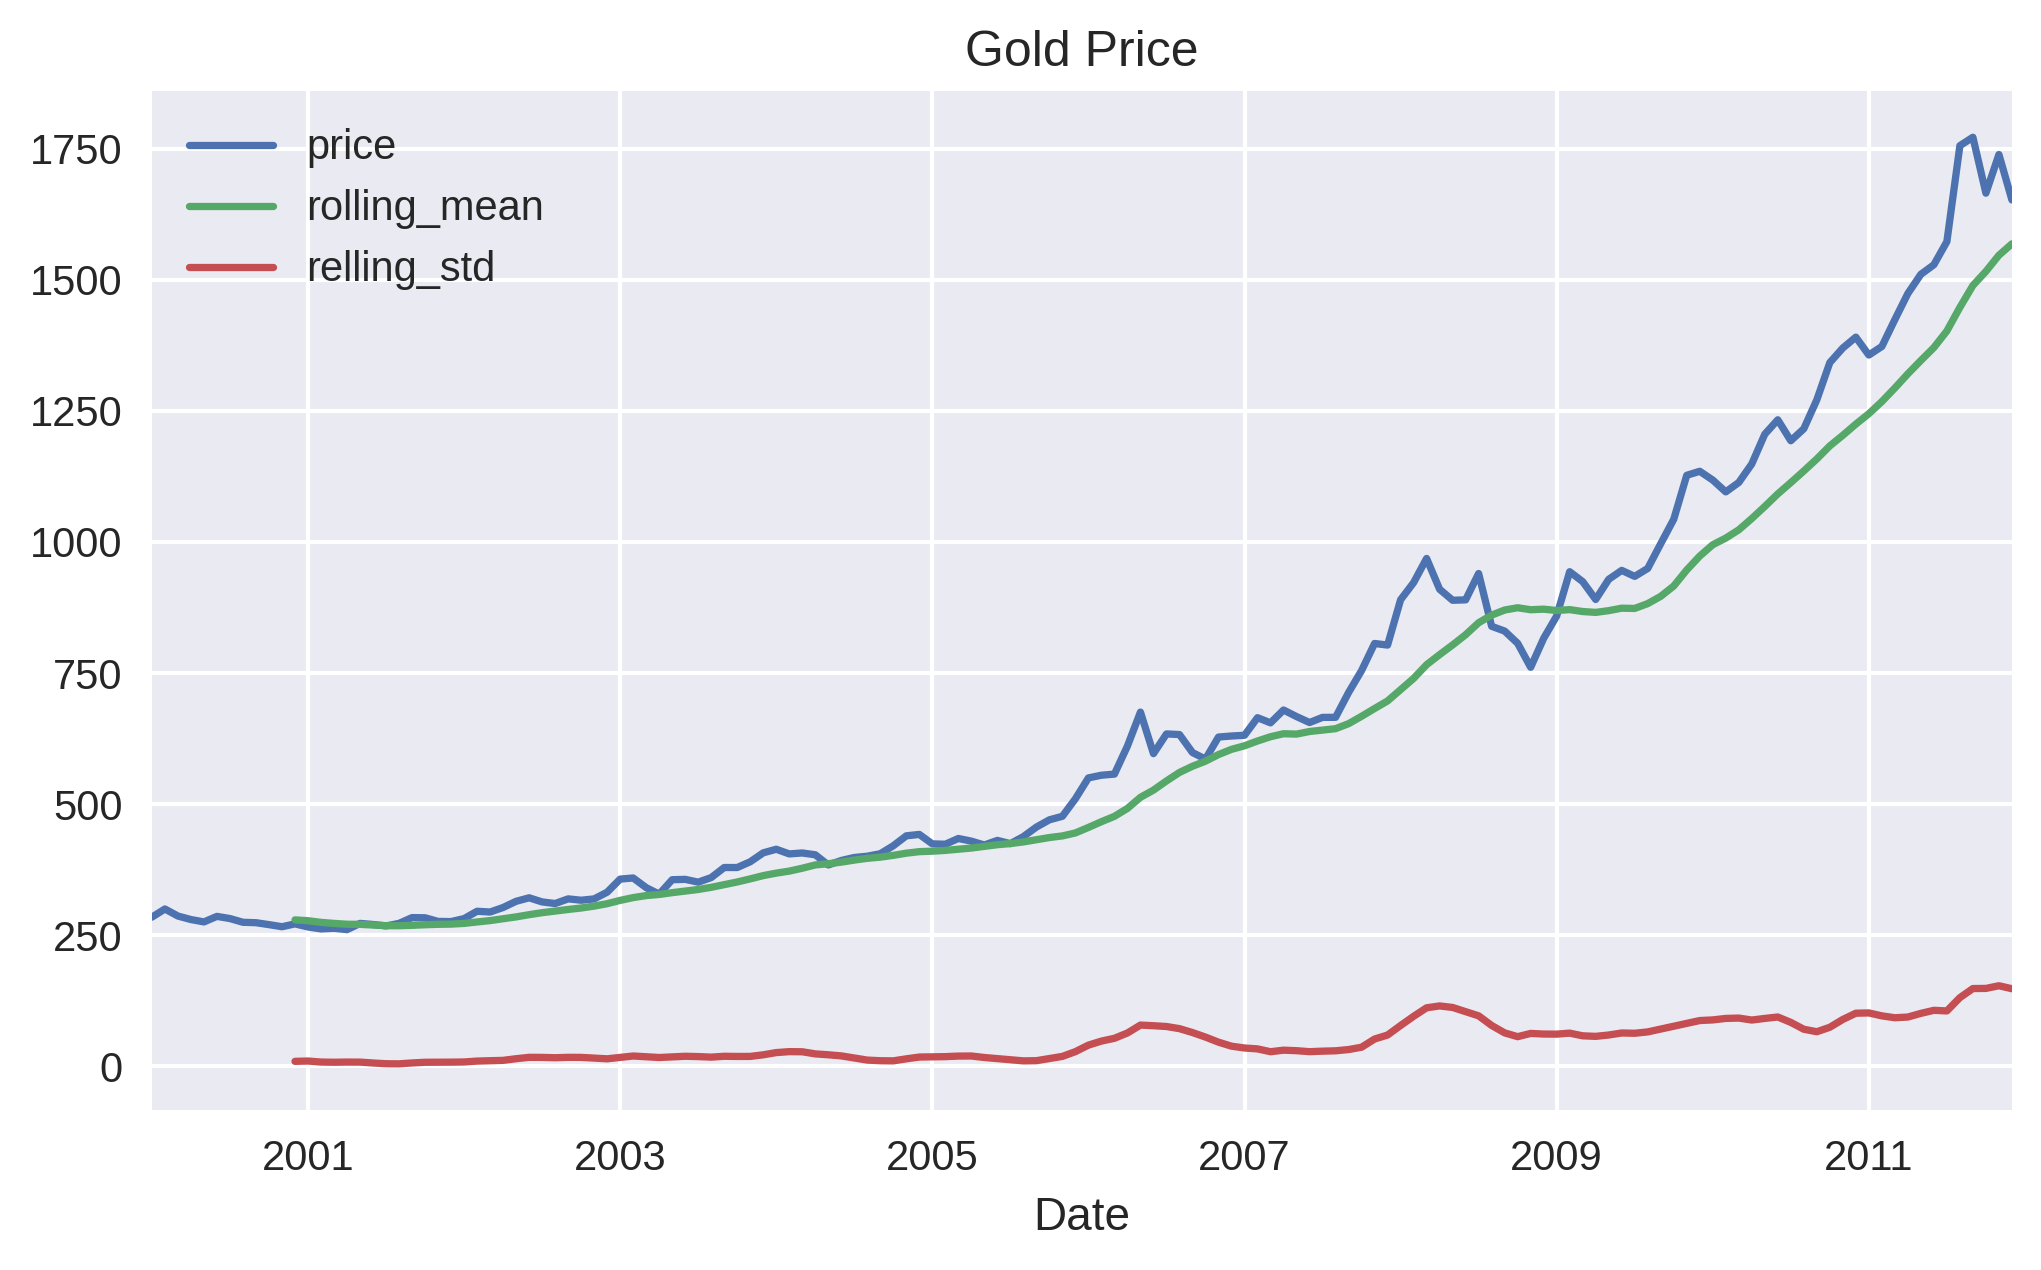

In [8]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['relling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

## Using the multiplicative model

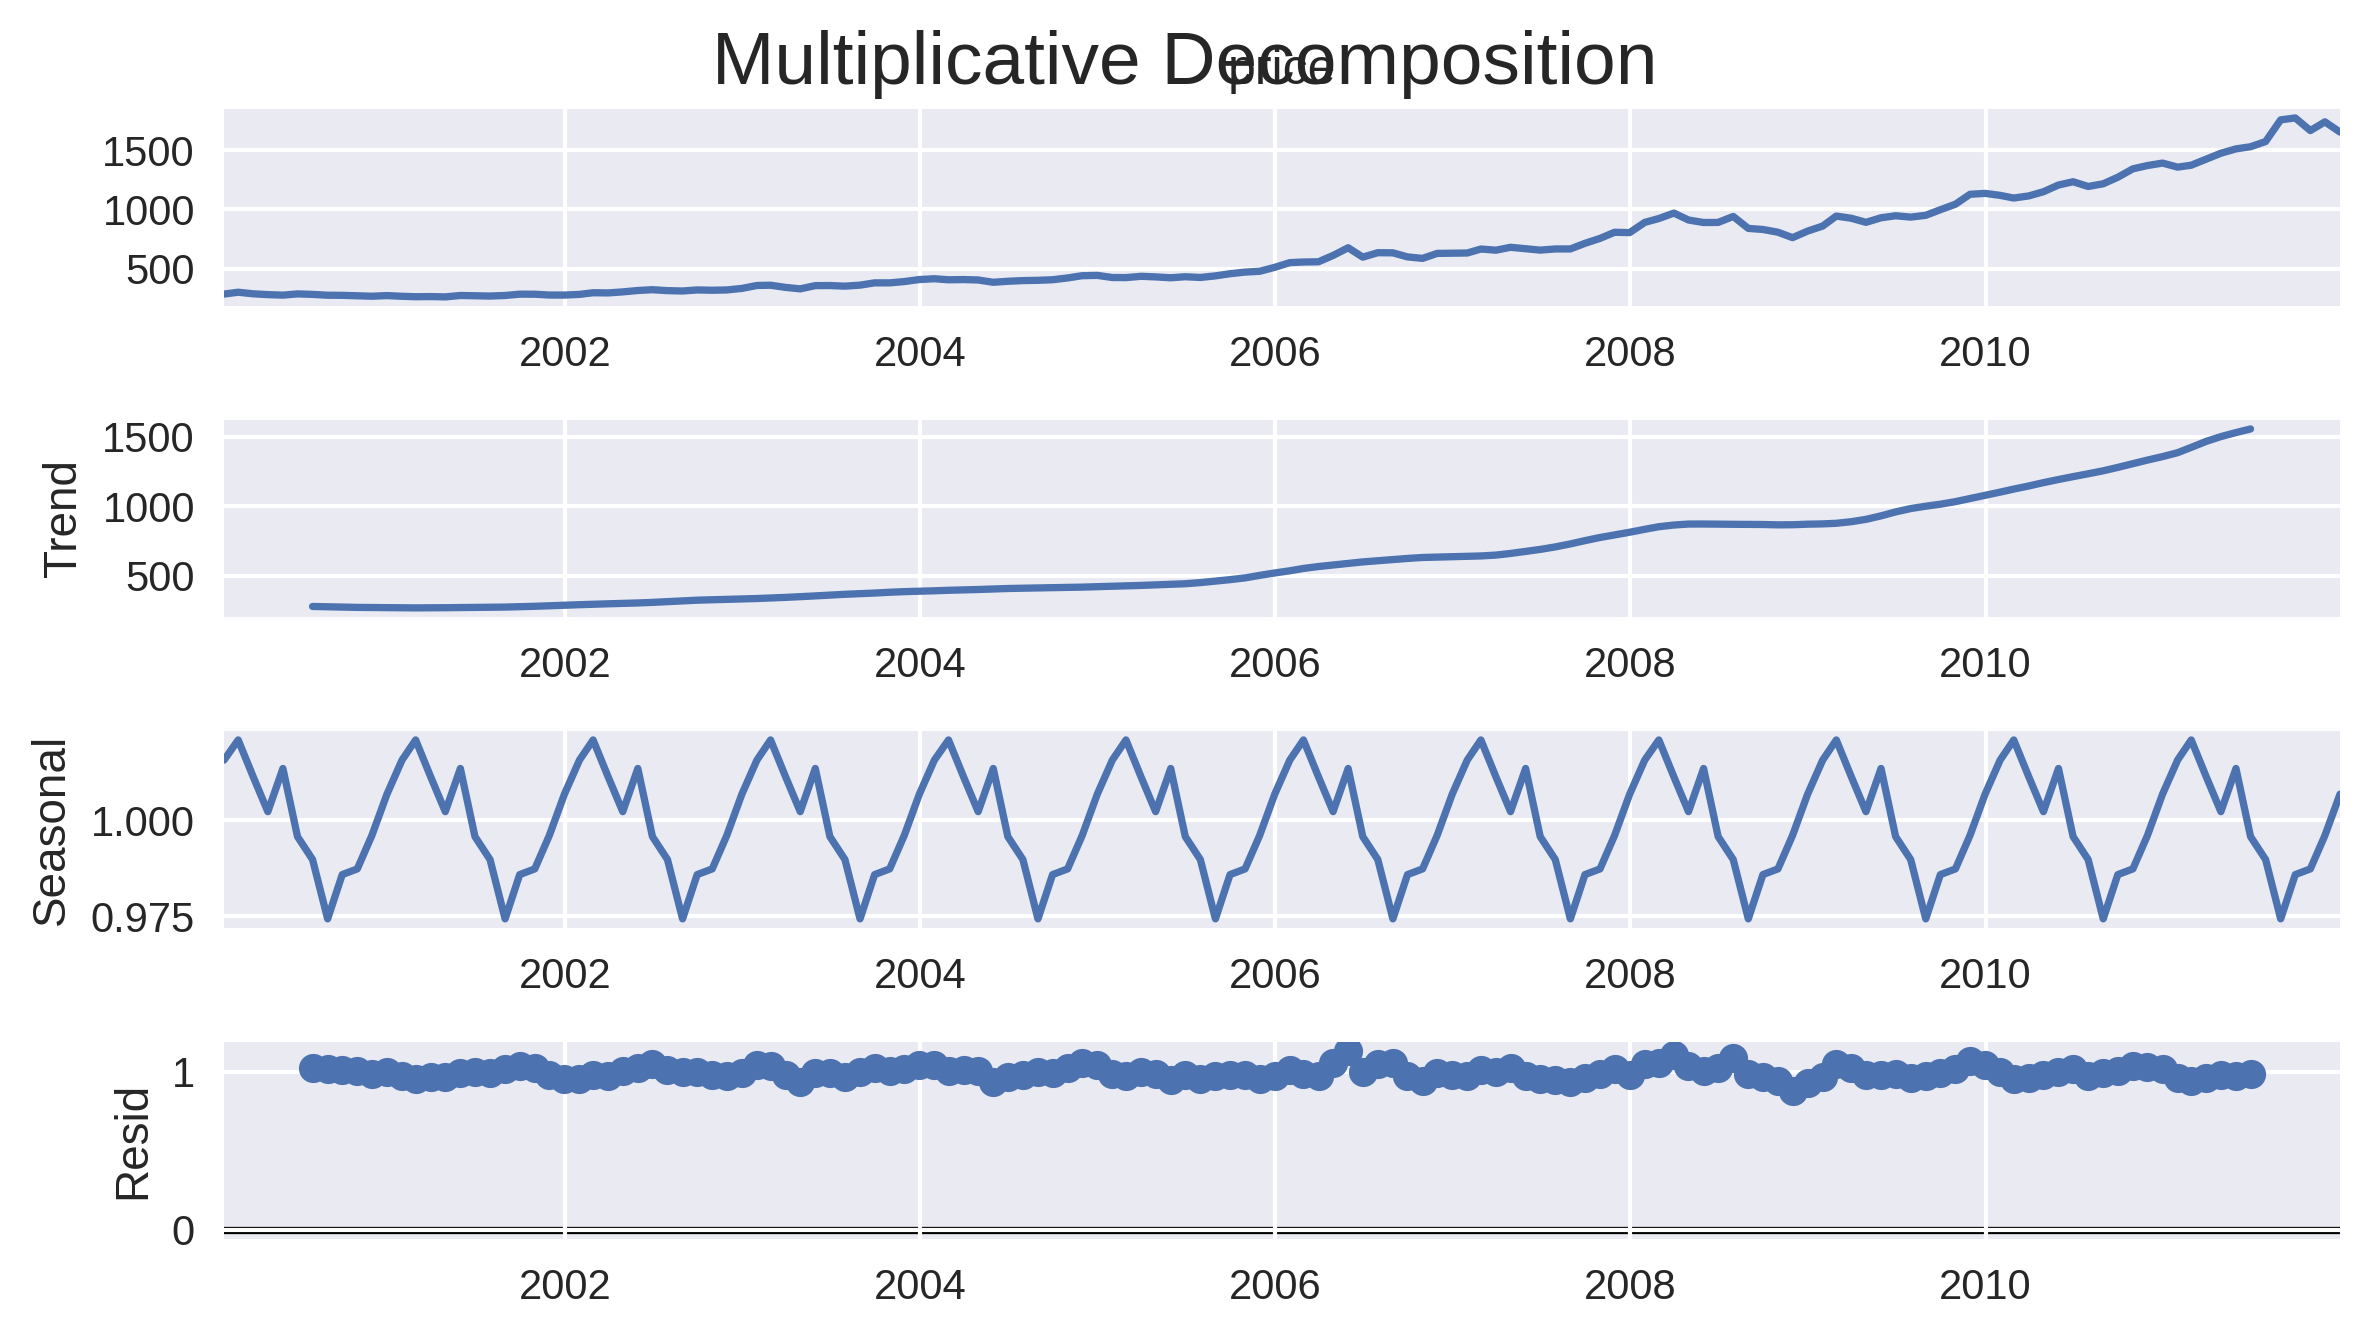

In [9]:
decomposition_results = seasonal_decompose(df.price, model='multiplicative')
decomposition_results.plot().suptitle('Multiplicative Decomposition', fontsize=18)
plt.tight_layout()
plt.show()